# Exercise 1 - chaotic behaviour of system

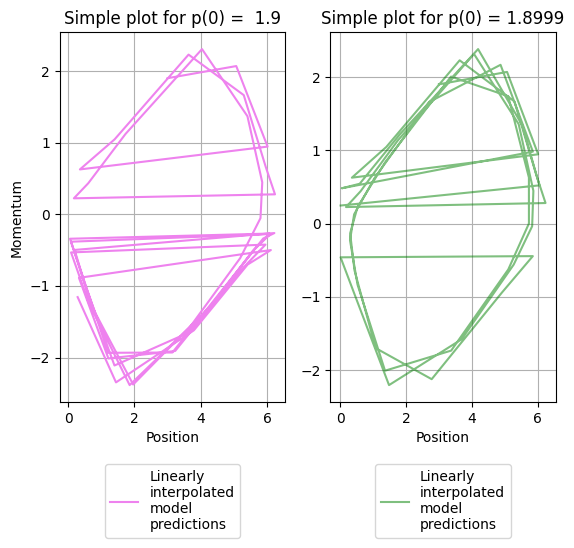

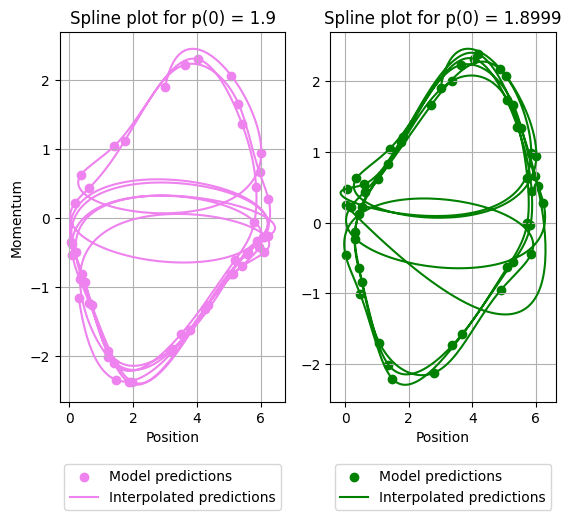

In [2]:
# modules

import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# step function

def step(x, p, K):
    p_new = p + K*np.sin(x)
    x_new = (x + p_new)%(2*np.pi)
    return x_new, p_new

# create place for two trajectories

size = 50
traj_1 = np.empty(shape = (2, size))
traj_2 = traj_1.copy()

# initial conditions

traj_1[:, 0] = 3, 1.9
traj_2[:, 0] = 3, 1.8999

# calculate trajectories

for i in range(size - 1):
    traj_1[:, i + 1] = step(traj_1[0, i], traj_1[1, i], 1.2)
    traj_2[:, i + 1] = step(traj_2[0, i], traj_2[1, i], 1.2)

# plot

plt.subplot(1, 2, 1)

plt.plot(traj_1[0, :], traj_1[1, :], color = "violet")
plt.title("Simple plot for p(0) =  1.9")
plt.xlabel("Position")
plt.ylabel("Momentum")
plt.grid()
plt.legend(["Linearly\ninterpolated\nmodel\npredictions"], bbox_to_anchor = [0.5, -0.15], loc = "upper center")

plt.subplot(1, 2, 2)

plt.plot(traj_2[0, :], traj_2[1, :], color = "green", alpha = 0.5)
plt.title("Simple plot for p(0) = 1.8999")
plt.xlabel("Position")
plt.grid()
plt.legend(["Linearly\ninterpolated\nmodel\npredictions"], bbox_to_anchor = [0.5, -0.15], loc = "upper center")

plt.show()

# spline plot

tck_1, u_1 = interpolate.splprep([traj_1[0, :], traj_1[1, :]], s = 0)
tck_2, u_2 = interpolate.splprep([traj_2[0, :], traj_2[1, :]], s = 0)

xnew_1, ynew_1 = interpolate.splev(np.linspace(0, 1, 1000), tck_1, der = 0)
xnew_2, ynew_2 = interpolate.splev(np.linspace(0, 1, 1000), tck_2, der = 0)

plt.subplot(1, 2, 1)

leg = []
plt.scatter(traj_1[0, :], traj_1[1, :], color = "violet")
leg.append("Model predictions")
plt.plot(xnew_1, ynew_1, color = "violet")
leg.append("Interpolated predictions")
plt.title("Spline plot for p(0) = 1.9")
plt.xlabel("Position")
plt.ylabel("Momentum")
plt.legend(leg, bbox_to_anchor = [0.5, -0.15], loc = "upper center")
plt.grid()

plt.subplot(1, 2, 2)

leg = []
plt.scatter(traj_2[0, :], traj_2[1, :], color = "green", alpha = 1)
leg.append("Model predictions")
plt.plot(xnew_2, ynew_2, color = "green", alpha = 1)
leg.append("Interpolated predictions")
plt.title("Spline plot for p(0) = 1.8999")
plt.legend(leg, bbox_to_anchor = [0.5, -0.15], loc = "upper center")
plt.xlabel("Position")
plt.grid()
plt.show()


# Exercise 2 - one long trajectory

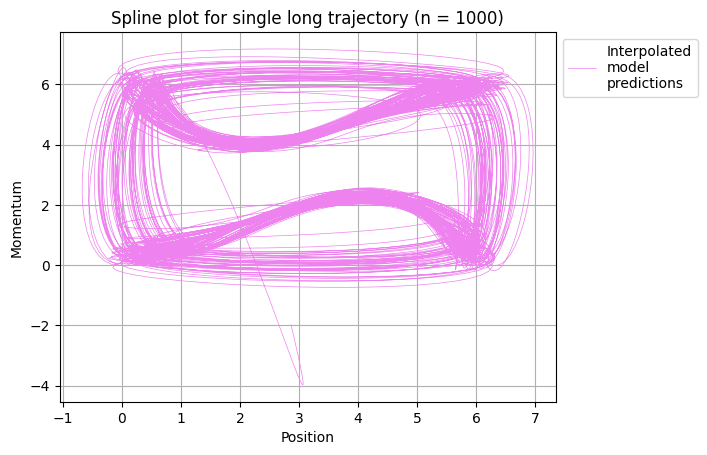

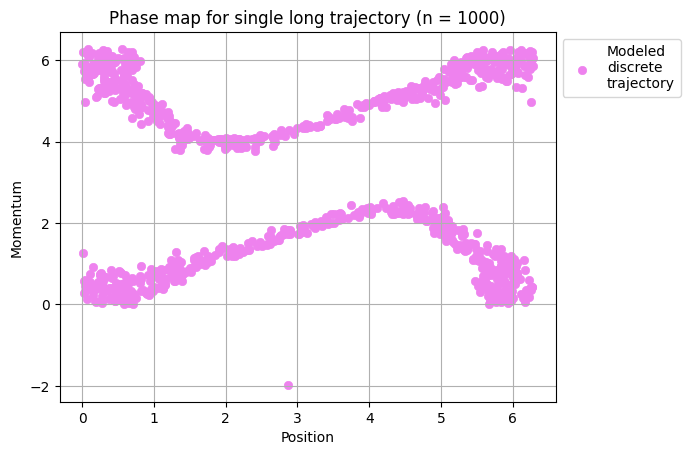

In [18]:
# step function with periodic boundary conditions

def step_periodic(x, p, K):
    xnew, pnew = step(x, p, K)
    pnew = pnew % (2*np.pi)
    return xnew, pnew

# create trajectory

size = 1000
traj_long = np.empty([2, size])
traj_long[:, 0] = np.random.uniform(low = -3, high = 3, size = 2)

for i in range(size - 1):
    traj_long[:, i + 1] = step_periodic(traj_long[0, i], traj_long[1, i], 1.2)

# plot

tck, u = interpolate.splprep([traj_long[0, :], traj_long[1, :]], s = 0)
xnew, ynew = interpolate.splev(np.linspace(0, 1, 10000), tck, der = 0)

plt.plot(xnew, ynew, color = "violet", linewidth = 0.5)
plt.grid()
plt.title("Spline plot for single long trajectory (n = " + str(size) + ")")
plt.legend(["Interpolated\nmodel\npredictions"], bbox_to_anchor = [1,1])
plt.xlabel("Position")
plt.ylabel("Momentum")
plt.show()

plt.scatter(traj_long[0, :], traj_long[1, :], color = "violet", linewidth = 0.5)
plt.grid()
plt.title("Phase map for single long trajectory (n = " + str(size) + ")")
plt.legend(["Modeled\ndiscrete\ntrajectory"], bbox_to_anchor = [1,1])
plt.xlabel("Position")
plt.ylabel("Momentum")
plt.show()

# Exercise 2 - 100 colorful trajectories

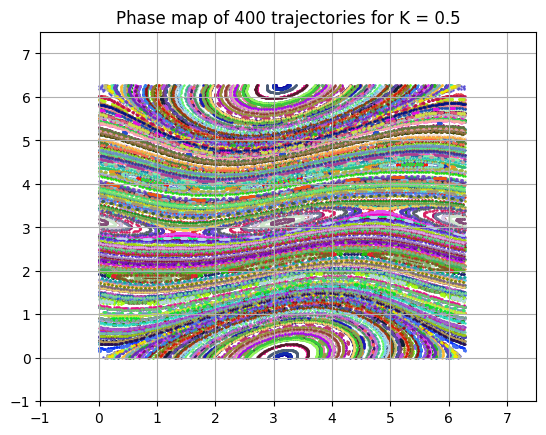

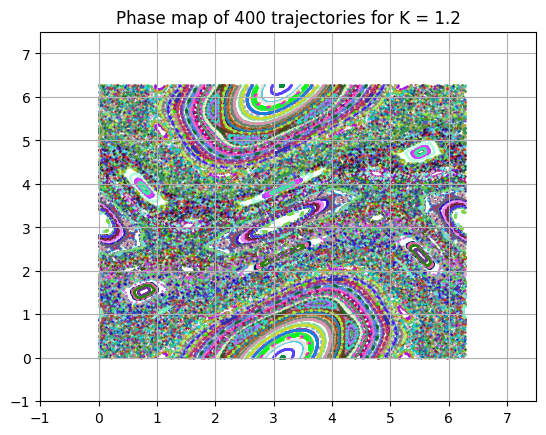

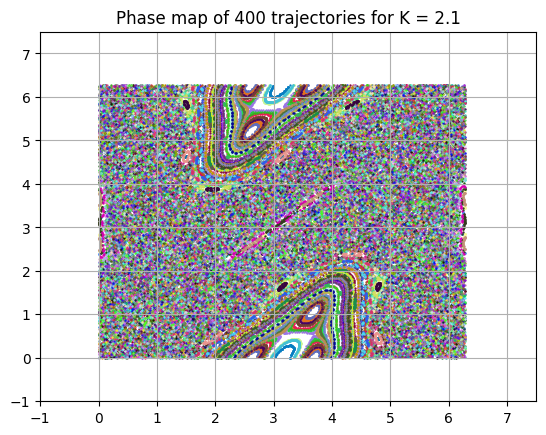

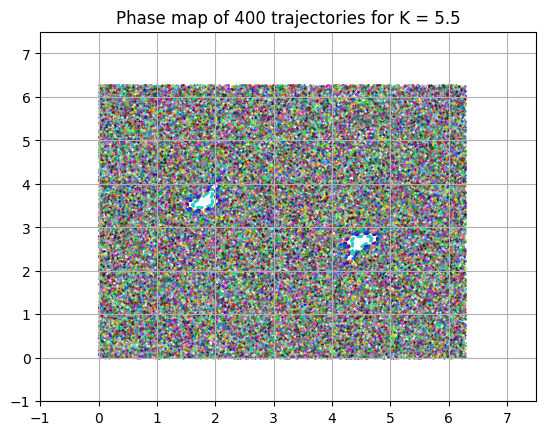

In [12]:
for K in 0.5, 1.2, 2.1, 5.5:
    
    trajectories_number = 400

    for each in range(trajectories_number):

        # initial

        rgb = np.random.random(3)
        size = 200

        # calculations

        traj_long = np.empty([2, size])
        traj_long[:, 0] = np.random.random(2) * 2 * np.pi

        for i in range(size - 1):
            traj_long[:, i + 1] = step_periodic(traj_long[0, i], traj_long[1, i], K)

        # plot

        plt.scatter(traj_long[0, :], traj_long[1, :], color = rgb, s=0.5)

    plt.grid()
    plt.xlim([-1, 7.5])
    plt.ylim([-1, 7.5])
    plt.title("Phase map of " + str(trajectories_number) + " trajectories for K = " + str(K))
    plt.show()